In [1]:
# TEAM MEMBERS :
# PRIYA MOHATA    PES2UG19CS301
# R SHARMILA      PES2UG19CS309
# RISHAB KSHATRI  PES2UG19CS327
# RITIK           PES2UG19CS332

In [2]:
# REQUIREMENT 1 : LOADING THE DATASET FROM GOOGLE DRIVE 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# IMPORTING LIBRARIES 

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from IPython.display import Image
from sklearn.cluster import KMeans
import random
import matplotlib.patches as mpatches
from itertools import count

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
# IMPORTING DATASET 

edgeDF = pd.read_csv(f"/content/drive/MyDrive/NAM-Dataset/got-s2-edges.csv")
nodeDF = pd.read_csv(f"/content/drive/MyDrive/NAM-Dataset/got-s2-nodes.csv")

In [6]:
# REQUIREMENT 2 
# FINDING UNIQUE NUMBER OF EDGES 

len(edgeDF.Target.unique())

98

In [7]:
# CHARACTER GRAPH 

G = nx.from_pandas_edgelist(edgeDF, 'Source', 'Target',['Weight'])
graph = nx.Graph()
degeDF = edgeDF.reset_index()
for index, row in edgeDF.iterrows():
  graph.add_edge(row.Source, row.Target, weight = row.Weight)

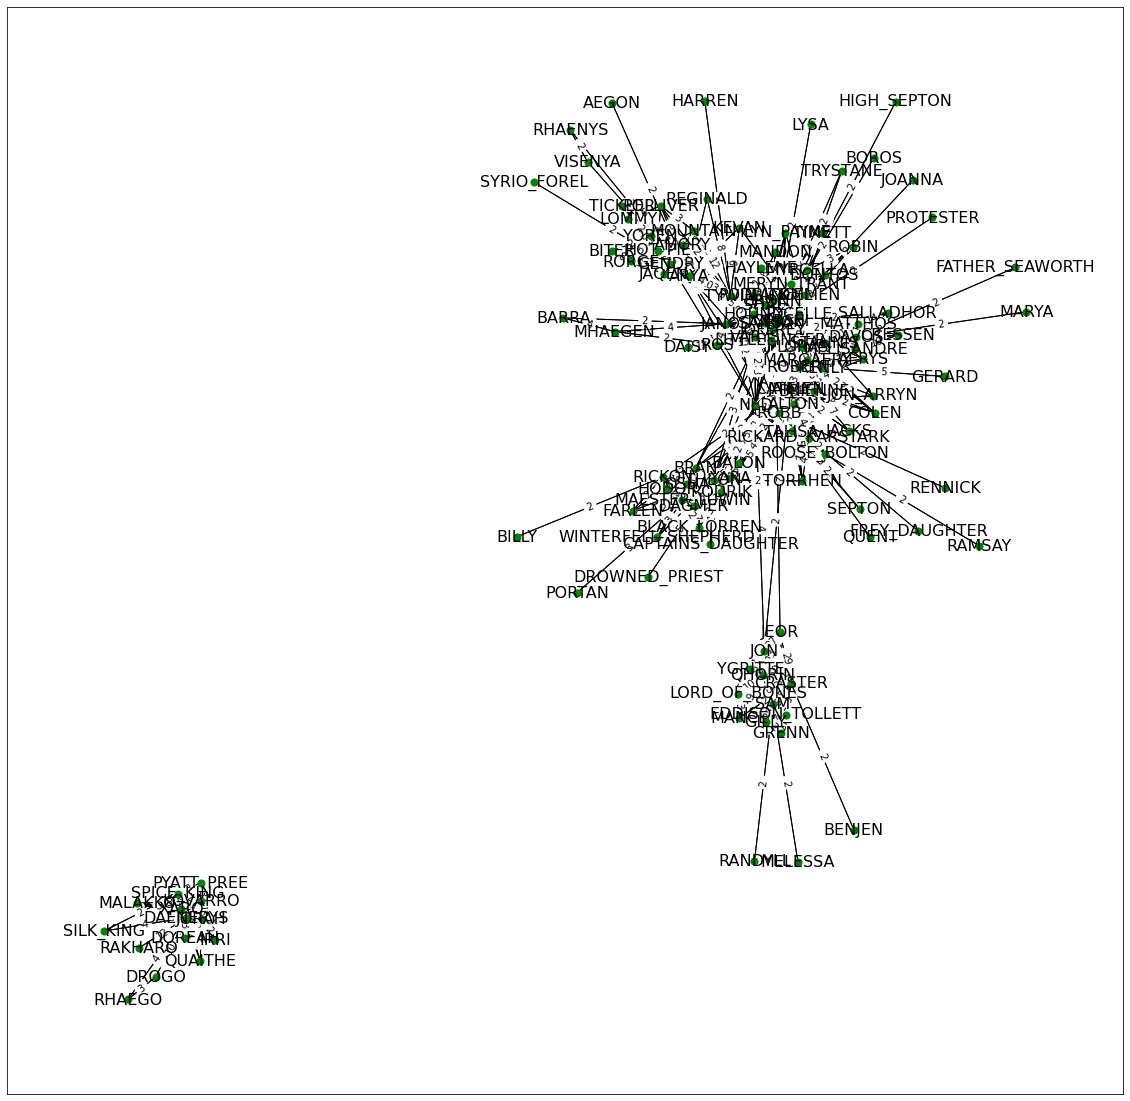

In [8]:
plt.figure(3, figsize = (20, 20))
pos = nx.fruchterman_reingold_layout(graph)
nx.draw_networkx(graph, pos = pos, node_size = 50, font_size = 16, node_color = "green")
nx.draw_networkx_edges(graph, pos = pos)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = edge_labels)
plt.show()

In [9]:
# TO FIND ISOLATES 
list(nx.isolates(graph))

[]

In [10]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes =",str(n))
print("Number of edges =", str(m))
print("Number of connected components =", str(nx.number_connected_components(G)))

Number of nodes = 129
Number of edges = 486
Number of connected components = 2


In [11]:
# REQUIREMENT 3 : CALCULATING THE FOLLOWING MEASURES [ BETWEENESS , PAGE RANK , LOCAL CLUSTERING COEFFICIENT ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


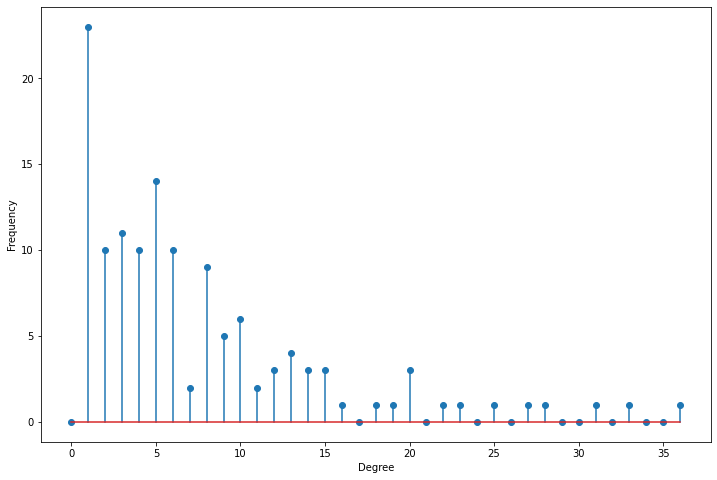

In [12]:
# DEGREE DISTRIBUTION 

deg_freq = np.array(nx.degree_histogram(G)).astype('float')
plt.figure(figsize = (12, 8))
plt.stem(deg_freq)
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

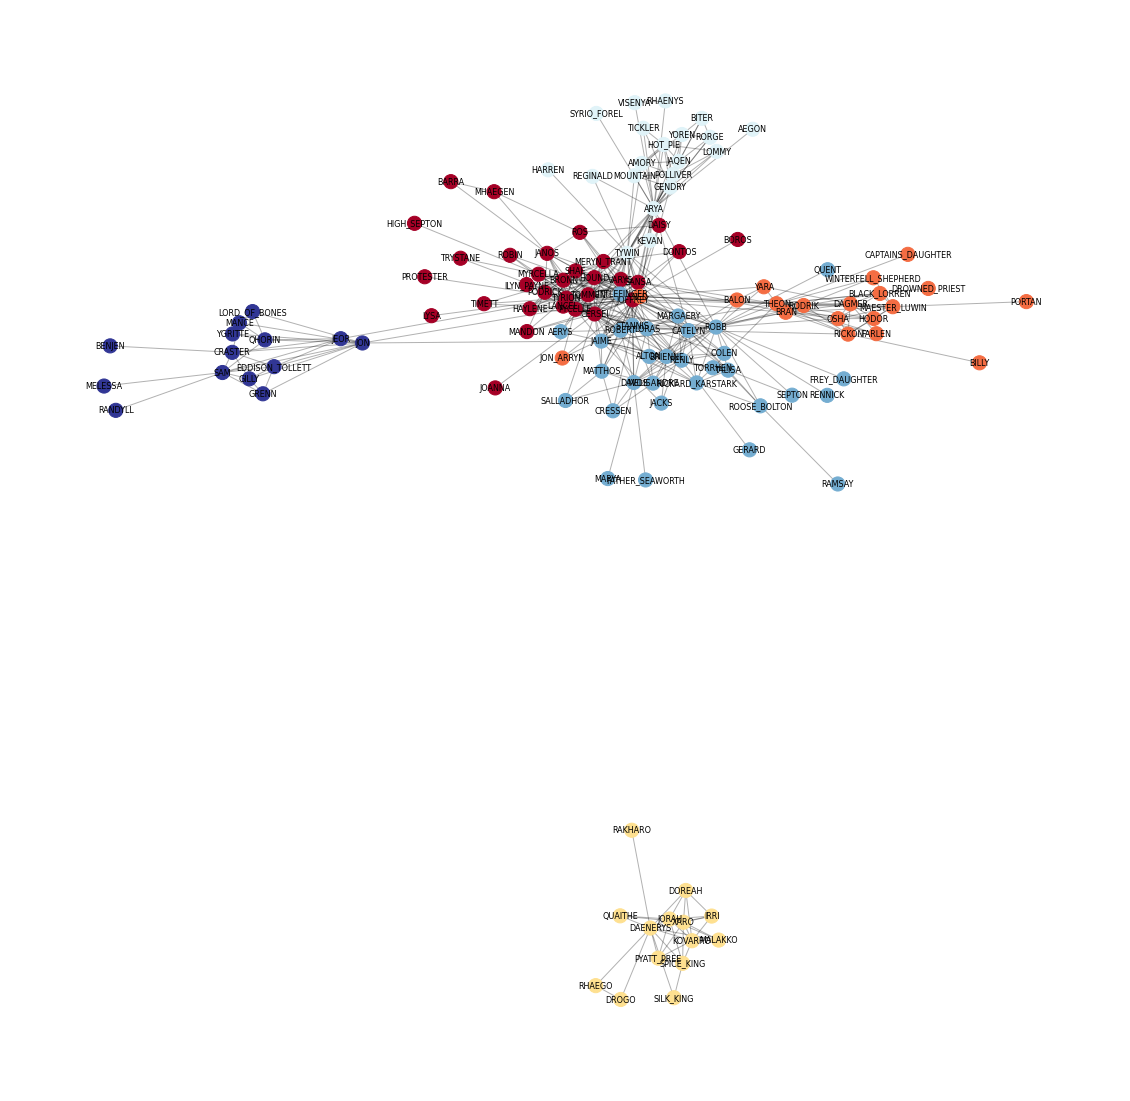

The communities detected are:
[('CERSEI', 0), ('TYRION', 0), ('VARYS', 0), ('SHAE', 0), ('BRONN', 0), ('JOFFREY', 0), ('SANSA', 0), ('PYCELLE', 0), ('HOUND', 0), ('JANOS', 0), ('LANCEL', 0), ('PODRICK', 0), ('TOMMEN', 0), ('ROS', 0), ('DAISY', 0), ('DONTOS', 0), ('HAYLENE', 0), ('MERYN_TRANT', 0), ('MYRCELLA', 0), ('MANDON', 0), ('TIMETT', 0), ('BARRA', 0), ('MHAEGEN', 0), ('ILYN_PAYNE', 0), ('ROBIN', 0), ('BOROS', 0), ('JOANNA', 0), ('HIGH_SEPTON', 0), ('LYSA', 0), ('TRYSTANE', 0), ('PROTESTER', 0), ('THEON', 1), ('YARA', 1), ('BALON', 1), ('BRAN', 1), ('OSHA', 1), ('DAGMER', 1), ('MAESTER_LUWIN', 1), ('RICKON', 1), ('HODOR', 1), ('RODRIK', 1), ('BLACK_LORREN', 1), ('CAPTAINS_DAUGHTER', 1), ('NED', 1), ('WINTERFELL_SHEPHERD', 1), ('FARLEN', 1), ('DROWNED_PRIEST', 1), ('JON_ARRYN', 1), ('PORTAN', 1), ('BILLY', 1), ('DAENERYS', 2), ('JORAH', 2), ('XARO', 2), ('SPICE_KING', 2), ('KOVARRO', 2), ('PYATT_PREE', 2), ('DOREAH', 2), ('QUAITHE', 2), ('IRRI', 2), ('RAKHARO', 2), ('DROGO', 2), ('

In [13]:
# COMMUNITY DETECTION 

import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 200, cmap = plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_labels(G, pos, font_size = 8)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)

print("The communities detected are:")
print(sorted(partition.items(), key = lambda item:item[1]))

In [14]:
# PAGE RANK 

from operator import itemgetter
print('\n sorted pagerank:\n')
pgr=nx.pagerank(G)
print(sorted(pgr.items(), key=itemgetter(1), reverse=True))


 sorted pagerank:

[('JOFFREY', 0.029361684689808154), ('TYRION', 0.028264878305951854), ('ARYA', 0.027389124196995487), ('ROBB', 0.026183956294545688), ('CERSEI', 0.025062377521028145), ('TYWIN', 0.02174997368706136), ('THEON', 0.019945681957348894), ('CATELYN', 0.019257426667142964), ('DAENERYS', 0.019099818027990025), ('STANNIS', 0.01750205318552669), ('NED', 0.016843866211496857), ('LITTLEFINGER', 0.016242971262581916), ('SANSA', 0.015296658574171156), ('JAIME', 0.015157177582644558), ('JON', 0.014714619018704298), ('DAVOS', 0.01434622165444695), ('SAM', 0.013515208242395684), ('LORAS', 0.012871774427963159), ('ROBERT', 0.012595006091497404), ('BRAN', 0.012228032603857913), ('BRONN', 0.012058742223970577), ('JORAH', 0.012054578260653405), ('XARO', 0.012054578260653405), ('PYCELLE', 0.01168715266023493), ('RENLY', 0.011588404206080538), ('VARYS', 0.011407344375324723), ('HOUND', 0.011152978468871382), ('BRIENNE', 0.011059696571850776), ('MAESTER_LUWIN', 0.010957294971075988), ('KOV

In [15]:
# CLUSTERING COEFFICIENT 

print("CLUSTERING COEFFICIENT : ",nx.transitivity(G))

CLUSTERING COEFFICIENT :  0.41570438799076215


In [16]:
# LOCAL CLUSTERING COEFFICIENT 

local_clustering = (nx.clustering(G))
print("LOCAL CLUSTERING COEFFICIENT : ",local_clustering)

LOCAL CLUSTERING COEFFICIENT :  {'CERSEI': 0.3247311827956989, 'TYRION': 0.26704545454545453, 'DAENERYS': 0.3076923076923077, 'JORAH': 0.6111111111111112, 'ARYA': 0.19943019943019943, 'JAQEN': 0.6071428571428571, 'DAVOS': 0.4095238095238095, 'STANNIS': 0.4329004329004329, 'JON': 0.3333333333333333, 'YGRITTE': 1.0, 'ROBB': 0.24338624338624337, 'TALISA': 0.4642857142857143, 'TYWIN': 0.2966666666666667, 'VARYS': 0.5824175824175825, 'SHAE': 0.7121212121212122, 'BRONN': 0.580952380952381, 'THEON': 0.23157894736842105, 'YARA': 0.7, 'CATELYN': 0.33201581027667987, 'XARO': 0.6111111111111112, 'JOFFREY': 0.27936507936507937, 'GENDRY': 0.4222222222222222, 'SANSA': 0.4678362573099415, 'QHORIN': 0.6, 'BALON': 0.8, 'SPICE_KING': 0.7333333333333333, 'MATTHOS': 0.5833333333333334, 'MELISANDRE': 0.7142857142857143, 'BRAN': 0.4358974358974359, 'OSHA': 0.7142857142857143, 'BRIENNE': 0.5512820512820513, 'JAIME': 0.38562091503267976, 'PYCELLE': 0.4945054945054945, 'DAGMER': 0.6, 'HOUND': 0.626373626373626

In [17]:
# AVERAGE CLUSTERING 

print(nx.average_clustering(G))

0.5767762682048713


In [18]:
# DEGREE CENTRALITY 

from operator import itemgetter
degc = nx.degree_centrality(G)
# LISTING THE SCORES
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist

[('JOFFREY', 0.28125),
 ('TYRION', 0.2578125),
 ('CERSEI', 0.2421875),
 ('ROBB', 0.21875),
 ('ARYA', 0.2109375),
 ('TYWIN', 0.1953125),
 ('CATELYN', 0.1796875),
 ('STANNIS', 0.171875),
 ('THEON', 0.15625),
 ('LITTLEFINGER', 0.15625),
 ('NED', 0.15625),
 ('SANSA', 0.1484375),
 ('JAIME', 0.140625),
 ('LORAS', 0.125),
 ('DAVOS', 0.1171875),
 ('BRONN', 0.1171875),
 ('ROBERT', 0.1171875),
 ('VARYS', 0.109375),
 ('PYCELLE', 0.109375),
 ('HOUND', 0.109375),
 ('DAENERYS', 0.1015625),
 ('BRAN', 0.1015625),
 ('BRIENNE', 0.1015625),
 ('RENLY', 0.1015625),
 ('JON', 0.09375),
 ('SHAE', 0.09375),
 ('TOMMEN', 0.09375),
 ('JANOS', 0.0859375),
 ('PODRICK', 0.0859375),
 ('GENDRY', 0.078125),
 ('DAGMER', 0.078125),
 ('MAESTER_LUWIN', 0.078125),
 ('LANCEL', 0.078125),
 ('RICKON', 0.078125),
 ('MYRCELLA', 0.078125),
 ('JORAH', 0.0703125),
 ('XARO', 0.0703125),
 ('MATTHOS', 0.0703125),
 ('SAM', 0.0703125),
 ('MARGAERY', 0.0703125),
 ('JAQEN', 0.0625),
 ('TALISA', 0.0625),
 ('MELISANDRE', 0.0625),
 ('OSHA', 

In [19]:
# BETWEENESS CENTRALITY 

bet = nx.betweenness_centrality(G)
# LISTING THE SCORES
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist

[('ARYA', 0.15104217250782007),
 ('TYRION', 0.14108037444122806),
 ('ROBB', 0.11704699582237152),
 ('JON', 0.11087767788061645),
 ('NED', 0.10431444702553139),
 ('JOFFREY', 0.10049862632402745),
 ('THEON', 0.08555810575183234),
 ('CATELYN', 0.06520519055130626),
 ('TYWIN', 0.06464758652813404),
 ('CERSEI', 0.06115998137352083),
 ('JAIME', 0.05977063114030665),
 ('JEOR', 0.04306253520107021),
 ('DAVOS', 0.03441323636275063),
 ('BRAN', 0.029562110304778604),
 ('SAM', 0.028589356312585155),
 ('STANNIS', 0.024570609238985765),
 ('JANOS', 0.024016132561074686),
 ('LITTLEFINGER', 0.02288067034757203),
 ('SANSA', 0.02201279295762214),
 ('RICKON', 0.018123727341651574),
 ('ROBERT', 0.017798102144355482),
 ('RENLY', 0.01621043932181221),
 ('MYRCELLA', 0.015996627489578506),
 ('CRASTER', 0.014768818254842376),
 ('MAESTER_LUWIN', 0.014454868681479088),
 ('ROOSE_BOLTON', 0.01390255905511811),
 ('VARYS', 0.010808942520044624),
 ('LORAS', 0.009321367175978224),
 ('RODRIK', 0.009286901039022546),
 ('

In [20]:
# CLOSENESS CENTRALITY 

clos = nx.closeness_centrality(G)
# LIST THE SCORES
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist

[('TYRION', 0.47667253521126757),
 ('JOFFREY', 0.47667253521126757),
 ('NED', 0.4615056818181818),
 ('ROBB', 0.45125000000000004),
 ('CERSEI', 0.4472742290748899),
 ('CATELYN', 0.443367903930131),
 ('ARYA', 0.4302171610169491),
 ('SANSA', 0.4284018987341772),
 ('LITTLEFINGER', 0.4284018987341772),
 ('TYWIN', 0.42660189075630256),
 ('JAIME', 0.4212914937759336),
 ('STANNIS', 0.4127286585365854),
 ('VARYS', 0.3981617647058824),
 ('ROBERT', 0.3981617647058824),
 ('THEON', 0.39353197674418605),
 ('LORAS', 0.3920125482625483),
 ('HOUND', 0.38752385496183206),
 ('PYCELLE', 0.3665388086642599),
 ('BRONN', 0.3639112903225807),
 ('BRAN', 0.3639112903225807),
 ('BRIENNE', 0.3639112903225807),
 ('DAVOS', 0.3626116071428571),
 ('ALTON', 0.35876766784452296),
 ('RENLY', 0.35876766784452296),
 ('SHAE', 0.35625),
 ('MATTHOS', 0.3550043706293706),
 ('TOMMEN', 0.3525390625),
 ('JANOS', 0.35010775862068966),
 ('PODRICK', 0.3489046391752577),
 ('LANCEL', 0.3477097602739726),
 ('MYRCELLA', 0.3477097602739

In [21]:
# REQUIREMENT 4 : SPECTRAL CLUSTERING 

In [22]:
# Class to perform spectral clustering for k clusters, given k

class SpectralClustering:
    
    def __init__(self, G):
        # Initialize the graph, nodes and the normalized Laplacian

        self.graph = G
        self.normalized_laplacian = nx.linalg.normalized_laplacian_matrix(G).toarray()
        self.nodes = G.nodes()

    def compute_eigenspace(self):
        # Compute the eigenvalues and the eigenvectors using Numpy and sort them in ascending order 

        eigenvalues, eigenvectors = np.linalg.eig(self.normalized_laplacian)

        sort_index = np.argsort(eigenvalues) # Returns the list of indices that would sort the array
        sorted_eigenvectors = eigenvectors[:, sort_index]

        return sorted_eigenvectors

    def fit(self, k):
        """
        Step 1: Extract the k eigen vectors and stack them vertically to form a matrix (i.e each vector is a column)
        Step 2: Every row of this matrix represents the features of the respective nodes of the graph
        Step 3: Perform K-Means clustering on this dataset to identify k clusters

        """
        eigenvectors = self.compute_eigenspace()
        k_eigenvectors = np.array(eigenvectors)[:,:k]
        dataset = pd.DataFrame(k_eigenvectors, index=self.nodes)

        # print(dataset)

        k_means_clusters = KMeans(n_clusters = k, random_state=42)
        self.clusters = k_means_clusters.fit(k_eigenvectors)
        
    def predict_labels(self):
        # Returns the labels 
        return self.clusters.labels_

    def assign_labels(self, labels):
        # Helper to assign the labels as node attributes
        for i,node in enumerate(self.graph.nodes()):
            self.graph.nodes[node]['label'] = labels[i]

    def plot_graph(self, n_clusters, title='Graph after Spectral Clustering'):
        # Plots the graph 

        labels = self.clusters.labels_
        self.assign_labels(labels)

        colour_list = ['blue','green','red','yellow','cyan', 'magenta','lightblue','grey']
        sampled_colours = dict(zip(set(labels),random.sample(colour_list, n_clusters)))

        legend_handles = []
        for label, color in sampled_colours.items():
            colour_handle = mpatches.Patch(color=color, label=label)
            legend_handles.append(colour_handle)

        colours = [sampled_colours[i] for i in labels]

        pos_fr = nx.fruchterman_reingold_layout(self.graph)
        plt.figure(figsize=(8,8))
        plt.title(title)
        plt.legend(handles=legend_handles)
        nx.draw(self.graph, pos=pos_fr, node_size=500, node_color=colours, with_labels=True)
        plt.show()

[0 0 2 2 1 1 0 0 4 4 0 0 1 0 0 0 3 3 0 2 0 1 0 4 0 2 0 0 3 3 0 0 0 3 0 3 0
 1 0 0 4 0 4 0 0 0 4 4 0 0 3 2 4 3 0 0 4 2 3 0 3 1 2 2 0 0 0 1 1 0 4 2 0 0
 0 0 0 1 0 2 1 0 4 1 0 0 0 1 3 3 0 1 0 0 0 0 0 0 0 0 2 2 0 1 2 0 0 3 0 0 0
 1 0 4 3 0 0 0 0 0 0 0 0 4 0 0 0 4 0]


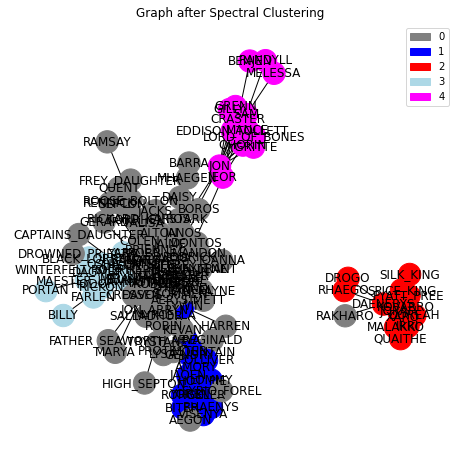

In [23]:
k = 5
SpecClust = SpectralClustering(G)
SpecClust.fit(k)
clustering_labels = SpecClust.predict_labels()
print(clustering_labels)

for i,node in enumerate(G.nodes()):
    G.nodes[node]['label'] = clustering_labels[i]

colour_map = ['']*len(clustering_labels)
for i, label in enumerate(clustering_labels):
    if label == 0:
        colour_map[i] = 'lightgreen'
    else:
        colour_map[i] = "red"

# nx.draw(CG, with_labels=True, node_color=colour_map)
SpecClust.plot_graph(k, title="Graph after Spectral Clustering")

In [24]:
# take a random sample of edges

proportion_edges = 0.25
edge_subset = random.sample(G.edges(), int(proportion_edges * G.number_of_edges()))

# remove some edges. the goal is to try and repredict these edges, and measure how close the prediction is to the original.

G = G.copy()
G.remove_edges_from(edge_subset)

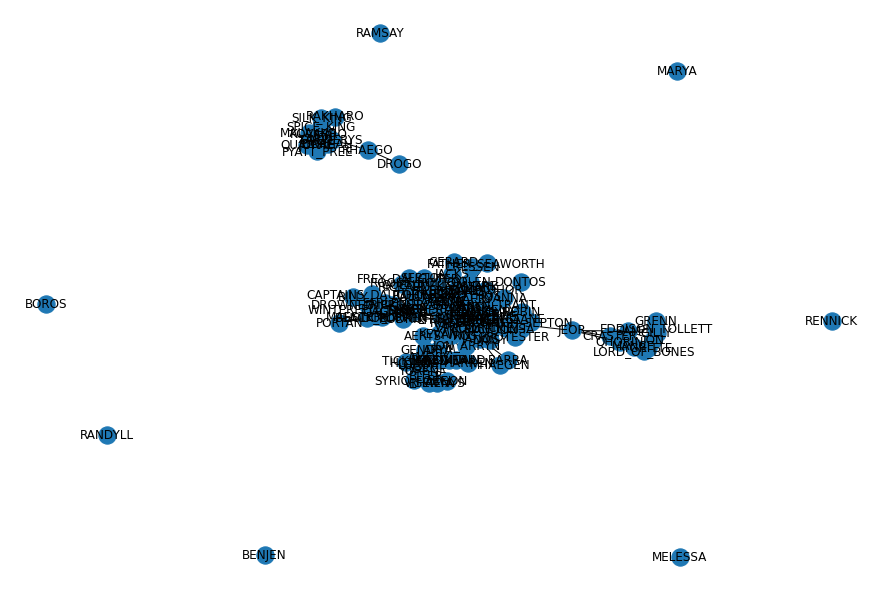

In [25]:
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels = True)

In [26]:
edge_subset_size = len(list(edge_subset))
print("Deleted edges =", str(edge_subset_size))
print("Remaining edges =", str(m - edge_subset_size))

# just printing the edge_subset.
print(edge_subset)

Deleted edges = 121
Remaining edges = 365
[('LITTLEFINGER', 'ROBIN'), ('CRASTER', 'GILLY'), ('TOMMEN', 'ROBERT'), ('BRIENNE', 'LORAS'), ('TYWIN', 'MARGAERY'), ('DAVOS', 'MARYA'), ('TYRION', 'SANSA'), ('DAVOS', 'CATELYN'), ('JON', 'QHORIN'), ('CERSEI', 'JANOS'), ('CATELYN', 'BRAN'), ('ROBB', 'BRIENNE'), ('CATELYN', 'ROOSE_BOLTON'), ('ROS', 'DAISY'), ('VARYS', 'PYCELLE'), ('ROOSE_BOLTON', 'RAMSAY'), ('CATELYN', 'LORAS'), ('ARYA', 'CATELYN'), ('SHAE', 'BRONN'), ('STANNIS', 'VARYS'), ('PYCELLE', 'PODRICK'), ('TYRION', 'CATELYN'), ('STANNIS', 'HOUND'), ('VARYS', 'BRONN'), ('JON', 'MANCE'), ('PYCELLE', 'AERYS'), ('DAENERYS', 'DROGO'), ('SPICE_KING', 'KOVARRO'), ('CERSEI', 'ALTON'), ('STANNIS', 'JAIME'), ('ARYA', 'HOUND'), ('CERSEI', 'MERYN_TRANT'), ('BRAN', 'HODOR'), ('JON', 'GRENN'), ('NED', 'ROBERT'), ('ROBB', 'CATELYN'), ('CRASTER', 'BENJEN'), ('PYCELLE', 'TIMETT'), ('ALTON', 'RICKARD_KARSTARK'), ('HOT_PIE', 'TICKLER'), ('SAM', 'RANDYLL'), ('JAIME', 'AERYS'), ('RICKARD_KARSTARK', 'TORRHEN

In [27]:
# REQUIREMENT 5 : LINK PREDICTION USING TRADITIONAL METHODS 

In [28]:
# calculating jaccard coefficient for all the node pairs in G

prediction_jaccard = list(nx.jaccard_coefficient(G))
#print(prediction_jaccard)
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])

In [29]:
# binary classification here. taking various thresholds for the jaccard coefficient.
# calculating fpr, tpr, and auc values for various thresholds of the jaccard coefficient.

fpr_jaccard, tpr_jaccard, thresholds_jaccard = roc_curve(label_jaccard, score_jaccard)
try:
    auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)
except ValueError:
    pass

In [30]:
# Adamic Adar Similarity
prediction_adamic = list(nx.adamic_adar_index(G))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])

In [31]:
fpr_adamic, tpr_adamic, thresholds_adamic = roc_curve(label_adamic, score_adamic)
try:
    auc_adamic = roc_auc_score(label_adamic, score_adamic)
except ValueError:
    pass

In [32]:
# Preferential Attachement Measure
prediction_pref = list(nx.preferential_attachment(G))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_pref])

In [33]:
fpr_pref, tpr_pref, thresholds_pref = roc_curve(label_pref, score_pref)
try:
    auc_pref = roc_auc_score(label_pref, score_pref)
except ValueError:
    pass

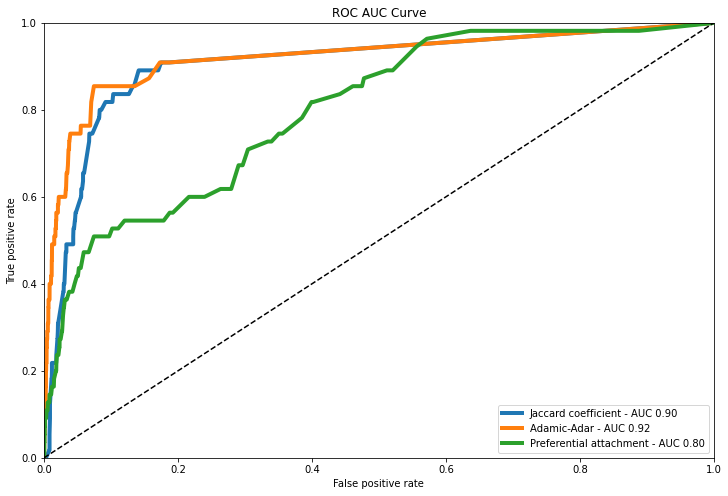

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

In [35]:
# the best performance coefficient might vary in some cases.
# however, in this particular case, it is clear from the auc, that ADAMIC-ADAR performs the best.
# now, find the threshold value at which ADAMIC-ADAR performs the best.

optimal_idx = np.argmax(tpr_pref - fpr_pref)
optimal_threshold = thresholds_pref[optimal_idx]
print("Optimal threshold =", optimal_threshold)

# this is the threshold value above which a link will be classified as existant, and below which a link will be classified as non-existant.

Optimal threshold = 88


In [36]:
# REQUIREMENT 6 : LINK PREDICTION USING GRAPH ML 


### a) GCN

In [37]:
!pip install stellargraph

     |████████████████████████████████| 435 kB 5.4 MB/s 
     |████████████████████████████████| 462 kB 47.9 MB/s 


In [38]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [39]:
from stellargraph import StellarGraph

In [40]:
df = pd.read_csv(f"/content/drive/MyDrive/NAM-Dataset/got-s2-edges.csv")
G=nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.Graph, edge_attr='Weight')

In [41]:
square = StellarGraph.from_networkx(G)

In [42]:
print(square.info())

StellarGraph: Undirected multigraph
 Nodes: 129, Edges: 486

 Node types:
  default: [129]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [486]
        Weights: all 1 (default)
        Features: none


In [43]:
g_feature_attr = G.copy()


def compute_features(node_id):
    return [ord(node_id[0]), len(node_id)]


for node_id, node_data in g_feature_attr.nodes(data=True):
    node_data["feature"] = compute_features(node_id)


In [44]:
square_feature_attr = StellarGraph.from_networkx(g_feature_attr, node_features="feature")
print(square_feature_attr.info())

StellarGraph: Undirected multigraph
 Nodes: 129, Edges: 486

 Node types:
  default: [129]
    Features: float32 vector, length 2
    Edge types: default-default->default

 Edge types:
    default-default->default: [486]
        Weights: all 1 (default)
        Features: none


In [45]:

G = square_feature_attr


In [46]:
epochs = 50

In [47]:
edge_splitter_test = EdgeSplitter(G)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 48 positive and 48 negative edges. **


In [48]:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 43 positive and 43 negative edges. **


In [49]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [50]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [51]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.6
)

In [52]:
x_inp, x_out = gcn.in_out_tensors()

In [53]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [54]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [55]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=["binary_accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
init_train_metrics = model.evaluate_generator(train_flow)
init_test_metrics = model.evaluate_generator(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.



Train Set Metrics of the initial (untrained) model:
	loss: 7.6246
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 7.6246
	binary_accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


In [57]:
history = model.fit_generator(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
1/1 - 2s - loss: 7.4473 - binary_accuracy: 0.5116 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 7.0927 - binary_accuracy: 0.5349 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 72ms/epoch - 72ms/step
Epoch 3/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 68ms/epoch - 68ms/step
Epoch 4/50
1/1 - 0s - loss: 7.2700 - binary_accuracy: 0.5233 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 73ms/epoch - 73ms/step
Epoch 5/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 65ms/epoch - 65ms/step
Epoch 6/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 80ms/epoch - 80ms/step
Epoch 7/50
1/1 - 0s - loss: 7.4473 - binary_accuracy: 0.5116 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 74ms/epoch - 74ms/step
Epoch 8/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.500

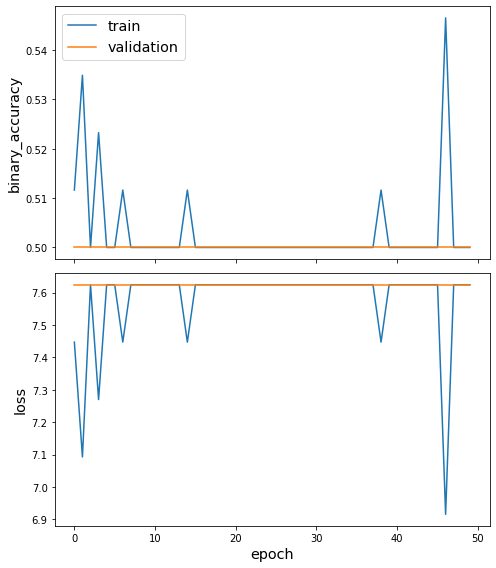

In [58]:
sg.utils.plot_history(history)

In [59]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 174ms/step - loss: 7.6246 - binary_accuracy: 0.5000

Train Set Metrics of the trained model:
	loss: 7.6246
	binary_accuracy: 0.5000

Test Set Metrics of the trained model:
	loss: 7.6246
	binary_accuracy: 0.5000


### b) GraphSAGE

In [60]:
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, HinSAGE, link_classification

In [61]:
batch_size = 20
epochs = 50
num_samples = [20, 10]

In [62]:
train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples)
train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)

In [63]:
test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples)
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

In [64]:
layer_sizes = [20, 20]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.3
)

In [65]:
x_inp, x_out = graphsage.in_out_tensors()

In [66]:
prediction = link_classification(
    output_dim=1, output_act="relu", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [67]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=["binary_accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [68]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

5/5 [==============================] - 1s 190ms/step - loss: 3.4734 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 3.4602
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 3.4734
	binary_accuracy: 0.5000


In [69]:
history = model.fit(train_flow, epochs=epochs, validation_data=test_flow, verbose=2)

Epoch 1/50
5/5 - 6s - loss: 1.0197 - binary_accuracy: 0.5116 - val_loss: 3.4840 - val_binary_accuracy: 0.5000 - 6s/epoch - 1s/step
Epoch 2/50
5/5 - 1s - loss: 1.1060 - binary_accuracy: 0.4767 - val_loss: 3.4156 - val_binary_accuracy: 0.5000 - 1s/epoch - 246ms/step
Epoch 3/50
5/5 - 1s - loss: 0.9217 - binary_accuracy: 0.5000 - val_loss: 3.3976 - val_binary_accuracy: 0.5000 - 1s/epoch - 262ms/step
Epoch 4/50
5/5 - 1s - loss: 1.0828 - binary_accuracy: 0.4651 - val_loss: 3.3835 - val_binary_accuracy: 0.5000 - 1s/epoch - 221ms/step
Epoch 5/50
5/5 - 1s - loss: 0.8992 - binary_accuracy: 0.5349 - val_loss: 3.3091 - val_binary_accuracy: 0.5000 - 1s/epoch - 270ms/step
Epoch 6/50
5/5 - 1s - loss: 0.9458 - binary_accuracy: 0.5233 - val_loss: 3.2639 - val_binary_accuracy: 0.5000 - 992ms/epoch - 198ms/step
Epoch 7/50
5/5 - 1s - loss: 0.9664 - binary_accuracy: 0.4884 - val_loss: 3.1794 - val_binary_accuracy: 0.5000 - 918ms/epoch - 184ms/step
Epoch 8/50
5/5 - 1s - loss: 0.8986 - binary_accuracy: 0.500

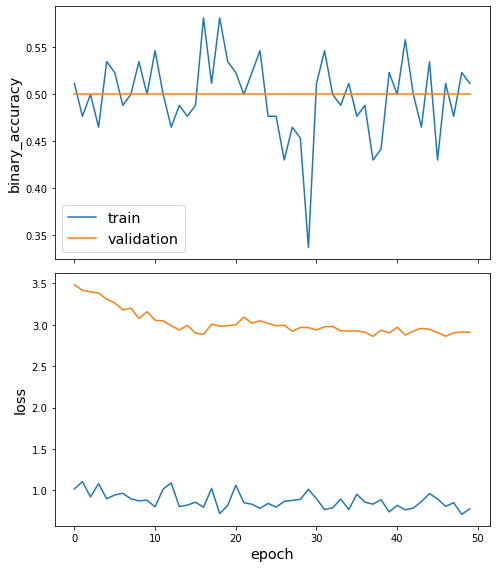

In [70]:
sg.utils.plot_history(history)

In [71]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

5/5 [==============================] - 0s 40ms/step - loss: 2.8782 - binary_accuracy: 0.5000

Train Set Metrics of the trained model:
	loss: 2.8679
	binary_accuracy: 0.5000

Test Set Metrics of the trained model:
	loss: 2.8782
	binary_accuracy: 0.5000


### c) GAT

In [72]:
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GAT


In [73]:
train_gen = FullBatchLinkGenerator(G_train, method="gat")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

In [74]:
test_gen = FullBatchLinkGenerator(G_test, method="gat")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

In [75]:
gcn = GAT(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen
)

In [76]:
x_inp, x_out = gcn.in_out_tensors()

In [77]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [78]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [79]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=["binary_accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [80]:
init_train_metrics = model.evaluate_generator(train_flow)
init_test_metrics = model.evaluate_generator(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.



Train Set Metrics of the initial (untrained) model:
	loss: 7.6246
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 7.6246
	binary_accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


In [81]:
history = model.fit_generator(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1/1 - 2s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 75ms/epoch - 75ms/step
Epoch 3/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 87ms/epoch - 87ms/step
Epoch 4/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 71ms/epoch - 71ms/step
Epoch 5/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 74ms/epoch - 74ms/step
Epoch 6/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 80ms/epoch - 80ms/step
Epoch 7/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_loss: 7.6246 - val_binary_accuracy: 0.5000 - 73ms/epoch - 73ms/step
Epoch 8/50
1/1 - 0s - loss: 7.6246 - binary_accuracy: 0.5000 - val_los

In [82]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 63ms/step - loss: 7.6246 - binary_accuracy: 0.5000

Train Set Metrics of the trained model:
	loss: 7.6246
	binary_accuracy: 0.5000

Test Set Metrics of the trained model:
	loss: 7.6246
	binary_accuracy: 0.5000


### 7) Comparision between traditional and Graph ML
For Traditional methods we are using Jaccards Similarity, Adamic and Preferential Attachements. <br>
We see that out of all the other models present, we see that PA does the best with a good result of 0.9, hence we can say that PA does best. <br><br>

For Graph ML we are using GCN, GraphSAGE and GAT 
GCN and GAT gives similar results, while GraphSAGE gives a better result of 0.63



### a) Metrics
Loss values for - 
> GCN &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 7.6246 <br>


> GraphSAGE &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.16 <br>

> GAT &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.6246 <br>

### b) Which is performing better and the reason
As we see that traditional methods are better than GraphML, by a majority. However PA model is almost similar to Graph Sage. 
<br>
<br>
Traditional Methods help in not having the factor of having problems which generally arise due to neural networks such as overfitting, vanishing gradients etc. Hence Traditional methods are simpler and quicker, while GraphML may take time and is complicated. 

### c) Analysis or insights related to season's plot
<br> We see that there are 4-5 communities/clusters within the season, as shown here from the Spectral Clustering. <br>
Different Colours show the Different Clusters. The names for the given characters are also given near the nodes. 


We have two isolated communities as well shown in the next diagram. 